# Numpy Basics

### Viewing Arrays as Images

In [2]:
import numpy as np

f = np.ones((100,120))
print("Imagem constante:\n",f)

Imagem constante:
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


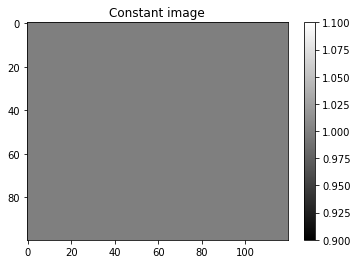

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Constant image')
plt.imshow(f,cmap='gray')
plt.colorbar()

# Understanding spacial and radiometric resolutio

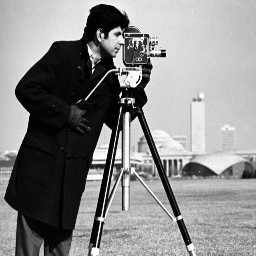

In [4]:
#import all necessary libraries
import numpy as np
from numpy.lib.stride_tricks import as_strided #for strided_rescale Function
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

#Display Original, un-altered, camerman image
img = Image.open('../data/cameraman.tif')
display(img)

1. **Entendendo a resolução espacial:** Reproduza as figuras dos slides 19 e 20 (Cap1.pdf). Use, no lugar da imagem da rosa, a imagem do cameraman.
2. **Entendendo a resolução radiométrica:** Visualize a imagem do cameraman em níveis de cinza e altere progressivamente a quantização (slide 26).

## Important Functions 

In [5]:
# Function with sole objective of making following code cleaner and easier to read
def show_image(input):
    if input=='true':
        plt.axis('off')
        plt.colorbar()
        plt.show()
    if input=='false':
        plt.axis('off')
        plt.show
# Function for rescaling bit representation of an image (Binning)       
def strided_rescale(g, bin_fac): #g == image array & bin_fac == binning factor
    strided = as_strided(g,
        shape=(g.shape[0]//bin_fac, g.shape[1]//bin_fac, bin_fac, bin_fac),
        strides=((g.strides[0]*bin_fac, g.strides[1]*bin_fac)+g.strides)) #strides are the number of bytes from one row to the next
    return strided.mean(axis=-1).mean(axis=-1) 

## Spacial Resolution (i)

Original Image Dimensions: (256, 256)



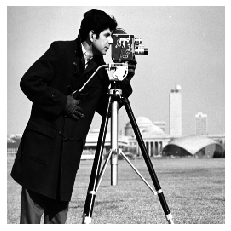

In [6]:
numpy_img = np.array(img) #transform image into array
shape = numpy_img.shape #get image dimensions

#show image in original dimensions
print("Original Image Dimensions: "+str(shape)+'\n')
plt.imshow(numpy_img, cmap = 'gray')
show_image('false')

New Image Dimensions: (128, 128)



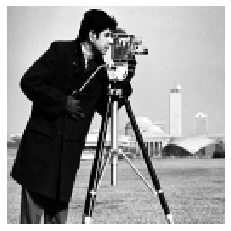

In [7]:
#Reduce Spacial Resolution to (128,128)
new_img = strided_rescale(numpy_img,2)
shape = new_img.shape
print("New Image Dimensions: " + str(shape) + "\n")
plt.imshow(new_img, cmap = 'gray')
show_image('false')

New Image Dimensions: (64, 64)



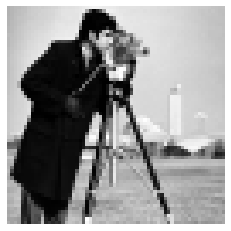

In [8]:
#Reduce Spacial Resolution to (64,64) 
new_img2 = strided_rescale(new_img,2)
shape = new_img2.shape
print("New Image Dimensions: " + str(shape) + "\n")
plt.imshow(new_img2, cmap = 'gray')
show_image('false')

New Image Dimensions: (32, 32)



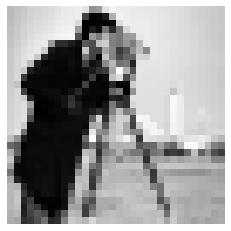

In [9]:
#Reduce Spacial Resolution to (32,32)
new_img3 = strided_rescale(new_img2,2)
shape = new_img3.shape
print("New Image Dimensions: " + str(shape) + "\n")
plt.imshow(new_img3, cmap = 'gray')
show_image('false')

New Image Dimensions: (16, 16)



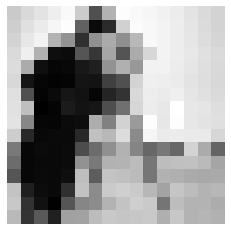

In [10]:
#Reduce Spacial Resolution to (16,16)
new_img4 = strided_rescale(new_img3,2)
shape = new_img4.shape
print("New Image Dimensions: " + str(shape) + "\n")
plt.imshow(new_img4, cmap = 'gray')
show_image('false')

New Image Dimensions: (8, 8)



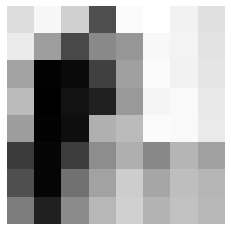

In [11]:
#Reduce Spacial Resolution to (8,8)
new_img5 = strided_rescale(new_img4,2)
shape = new_img5.shape
print("New Image Dimensions: " + str(shape) + "\n")
plt.imshow(new_img5, cmap = 'gray')
show_image('false')

## Spacial Resolution (ii)

Original Image: (256,256)


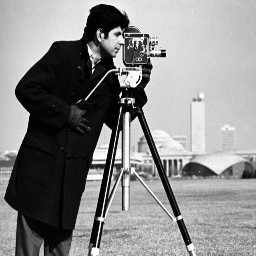


Second Image: (128,128)


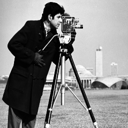


Third Image: (64,64)


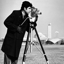


Fourth Image; (32,32)


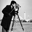

In [12]:
# generate new, smaller images
new_image = img.resize((128,128))
new_image2 = img.resize((64,64))
new_image3 = img.resize((32,32))

# display original and new images with appropriate titles
print("Original Image: (256,256)")
display(img)
print("\nSecond Image: (128,128)")
display(new_image)
print("\nThird Image: (64,64)")
display(new_image2)
print("\nFourth Image; (32,32)")
display(new_image3)

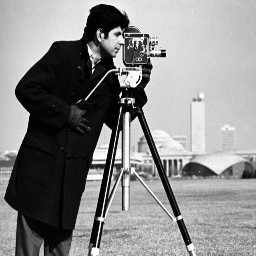

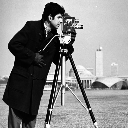

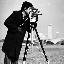

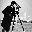

In [13]:
# Second Method:
g = np.array(img)
g.shape
# generate image with half the columns and lines as the original
g1a = g[::2,::2]
# generate image with half the columns and lines as the previous image
g2a = g1a[::2, ::2]
# generate image with half the columns and lines as the previous image
g3a = g2a[::2, ::2]
# generate image with half the columns and lines as the previous image
g4a = g3a[::2, ::2]
# generate image with half the columns and lines as the previous image
g5a = g4a[::2, ::2]
# generate image with half the columns and lines as the previous image
g6a = g5a[::2, ::2]

display(Image.fromarray(g))
display(Image.fromarray(g1a))
display(Image.fromarray(g2a))
display(Image.fromarray(g3a))
display(Image.fromarray(g4a))
display(Image.fromarray(g5a))
display(Image.fromarray(g6a))

## Radiometric Resolution


Original Image: 256 Colors


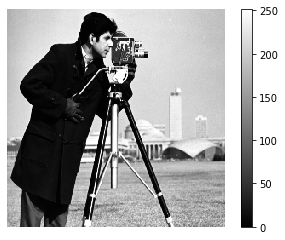


New Image: 128 Colors


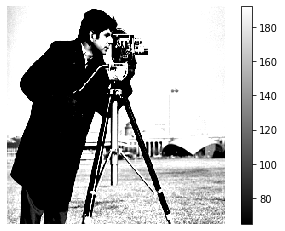


New Image: 64 Colors


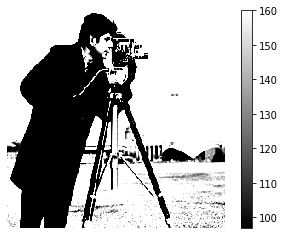


New Image: 32 Colors


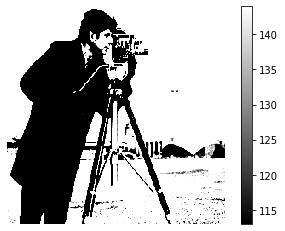


New Image: 16 Colors


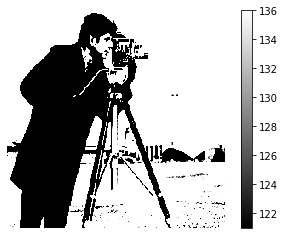


New Image: 8 Colors


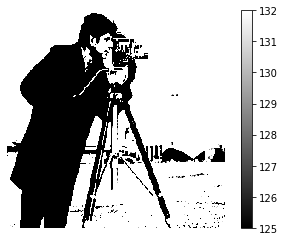


New Image: 4 colors


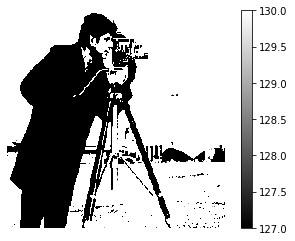


Final Image: binary colormap


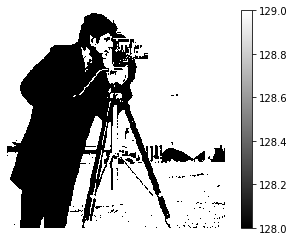

In [14]:
#show image in original color map
print("\nOriginal Image: 256 Colors")
plt.imshow(numpy_img, cmap = 'gray')
show_image('true')

#show image in "half colormap"
print("\nNew Image: 128 Colors")
plt.imshow(numpy_img, cmap='gray', vmin=65, vmax=192)
show_image('true')

#show image in "quarter colormap"
print("\nNew Image: 64 Colors")
plt.imshow(numpy_img, cmap='gray', vmin=97, vmax=160)
show_image('true')

#show image in "one 8th colormap"
print("\nNew Image: 32 Colors")
plt.imshow(numpy_img, cmap='gray', vmin=113, vmax=144)
show_image('true')

#show image in "one 16th colormap"
print("\nNew Image: 16 Colors")
plt.imshow(numpy_img, cmap='gray', vmin=121, vmax=136)
show_image('true')

#show image in "one 32ndth colormap"
print("\nNew Image: 8 Colors")
plt.imshow(numpy_img, cmap='gray', vmin=125, vmax=132)
show_image('true')

#show image in "one 64th colormap"
print("\nNew Image: 4 colors")
plt.imshow(numpy_img, cmap='gray', vmin=127, vmax=130)
show_image('true')

#show image in "one 128th colormap"
print("\nFinal Image: binary colormap")
plt.imshow(numpy_img, cmap='gray', vmin=128, vmax=129)
show_image('true')